In [2]:
import numpy as np
import pandas as pd
import urllib.request 
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.decomposition import PCA #主成分分析器
from sklearn.datasets import load_iris

# データセット読み込み
iris = load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
# アヤメの種類を列末に追加(3種類)
df["CLASS"]=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),CLASS
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


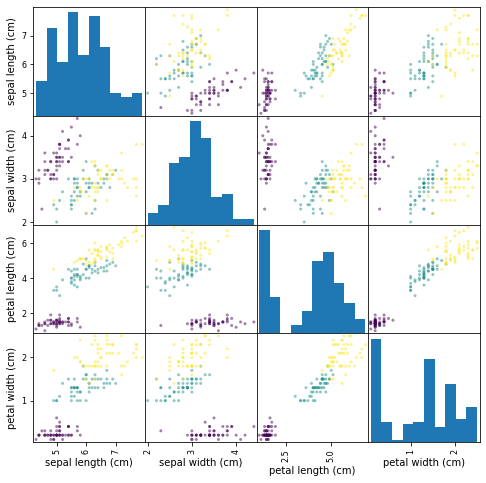

In [3]:
# 説明変数の組み合わせとアヤメの種類をプロット
from pandas import plotting 
plotting.scatter_matrix(df.iloc[:, 0:4], figsize=(8, 8), c=list(df.iloc[:, 4]), alpha=0.5)
plt.show()

In [4]:
# 行列の標準化
dfs = df.iloc[:, 0:4].apply(lambda x: (x-x.mean())/x.std(), axis=0)
dfs.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.897674,1.015602,-1.335752,-1.311052
1,-1.139200,-0.131539,-1.335752,-1.311052
2,-1.380727,0.327318,-1.392399,-1.311052
3,-1.501490,0.097889,-1.279104,-1.311052
4,-1.018437,1.245030,-1.335752,-1.311052


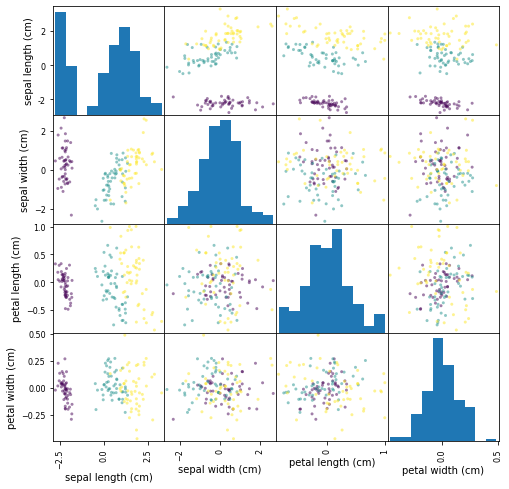

In [5]:
#主成分分析
pca = PCA()
pca.fit(dfs)
feature = pca.transform(dfs)

# 標準化後のプロット
from pandas import plotting 
plotting.scatter_matrix(pd.DataFrame(feature, 
                        columns=dfs.columns), 
                        figsize=(8, 8), c=list(df.iloc[:, 4]), alpha=0.5) 
plt.show()


In [6]:
# 寄与率算出
f_df = pd.DataFrame(pca.explained_variance_ratio_, index=dfs.columns)
f_df.columns=["Feature"]
# アヤメの種類は、第二主成分までで約95%の情報を説明できる
f_df

,Feature
sepal length (cm),0.729624
sepal width (cm),0.228508
petal length (cm),0.036689
petal width (cm),0.005179


<IPython.core.display.Javascript object>


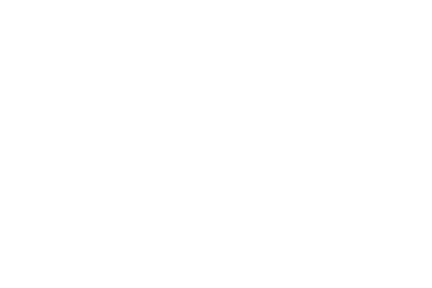

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


<IPython.core.display.Javascript object>


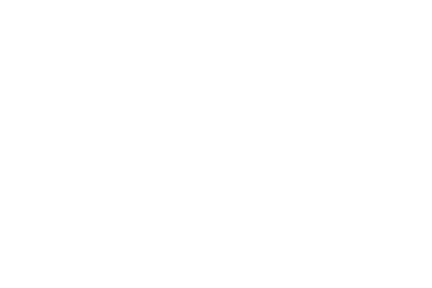

In [20]:
# 円グラフ表示
plt.pie(f_df, labels=f_df.index, autopct="%1.1f%%", startangle=90, counterclock=False)
plt.legend()
plt.show()

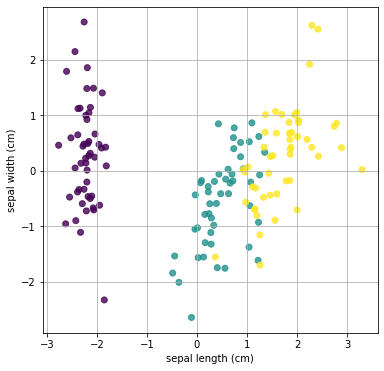

In [42]:
# 第一主成分と第二主成分でプロット
plt.figure(figsize=(6, 6))
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, c=list(df.iloc[:, 4]))
plt.grid()
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.show()